In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
data = pd.read_csv('data/Weekly.csv')
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [30]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [31]:
data['Direction'].value_counts()

Direction
Up      605
Down    484
Name: count, dtype: int64

In [32]:
data_clean = data.copy()
data_clean['Direction'] = data_clean['Direction'].replace({'Up': 1, 'Down': 0})
data_clean.head()

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_5024\2853372096.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Direction'] = data_clean['Direction'].replace({'Up': 1, 'Down': 0})


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [33]:
data_clean.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


In [34]:
data_clean.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


In [35]:
import tools
corr_matrix = data_clean.corr()
# only need upper triangular part of the correlation matrix, due to symmetry
corr_filtered = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_filtered = tools.condense_upper_triangular(corr_filtered)
print(corr_filtered[abs(corr_filtered['Correlation']) > 0.5])

   Variable 1 Variable 2  Correlation
5        Year     Volume     0.841942
35      Today  Direction     0.720025


In [36]:
tools.find_highest_correlations(data_clean.corr())

Column 'Year' has highest correlation with 'Volume' : 0.84
Column 'Lag1' has highest correlation with 'Today' : -0.08
Column 'Lag2' has highest correlation with 'Volume' : -0.09
Column 'Lag3' has highest correlation with 'Lag2' : -0.08
Column 'Lag4' has highest correlation with 'Lag5' : -0.08
Column 'Lag5' has highest correlation with 'Lag4' : -0.08
Column 'Volume' has highest correlation with 'Year' : 0.84
Column 'Today' has highest correlation with 'Direction' : 0.72
Column 'Direction' has highest correlation with 'Today' : 0.72


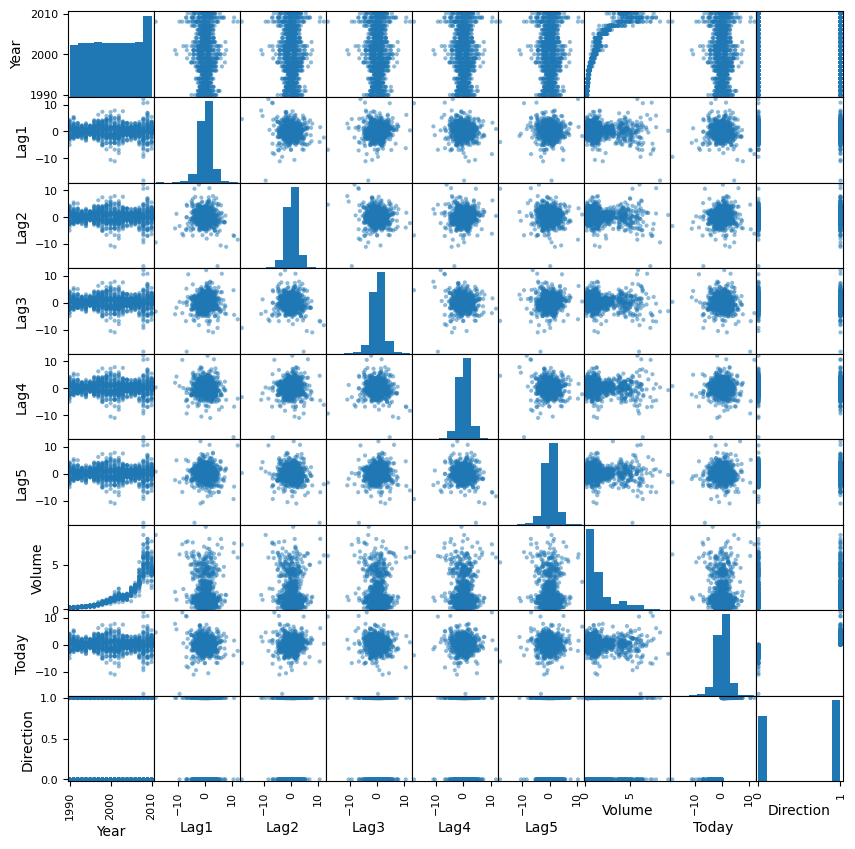

In [37]:
pd.plotting.scatter_matrix(data_clean, figsize=(10, 10))
plt.show()

In [38]:
X = add_constant(data_clean[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
y = data_clean['Direction']
log_reg = Logit(y, X)
log_reg_fit = log_reg.fit()
log_reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                0.006580
Time:                        16:29:07   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [39]:
def make_confusion_matrix(model, X, y):
    conf_matrix = confusion_matrix(y, model.predict(X) > 0.5)
    conf_matrix = pd.DataFrame(conf_matrix)
    conf_matrix.columns = ['Predicted Down', 'Predicted Up']
    conf_matrix.index = ['Actual Down', 'Actual Up']
    return conf_matrix

In [40]:
conf_matrix = make_confusion_matrix(log_reg_fit, X, y)
print(conf_matrix)

<function confusion_matrix at 0x0000014CE9A1BE20>


In [42]:
# fraction of correct predictions
correct_predictions = np.diag(conf_matrix).sum() / conf_matrix.sum().sum()
print(f'Fraction of correct predictions: {correct_predictions}')

Fraction of correct predictions: 0.5610651974288338


In [43]:
train = data_clean[data_clean['Year'] < 2009]
test = data_clean[data_clean['Year'] >= 2009]
train.shape, test.shape

((985, 9), (104, 9))

In [44]:
X_train = add_constant(train[['Lag2']])
y_train = train['Direction']
X_test = add_constant(test[['Lag2']])
y_test = test['Direction']
log_reg_1 = Logit(y_train, X_train)
log_reg_fit_1 = log_reg_1.fit()
log_reg_fit_1.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                0.003076
Time:                        16:29:38   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [45]:
conf_matrix_1 = make_confusion_matrix(log_reg_fit_1, X_test, y_test)
print(conf_matrix_1)

             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56


In [46]:
correct_predictions = np.diag(conf_matrix_1).sum() / conf_matrix_1.sum().sum()
print(f'Fraction of correct predictions: {correct_predictions}')

Fraction of correct predictions: 0.625


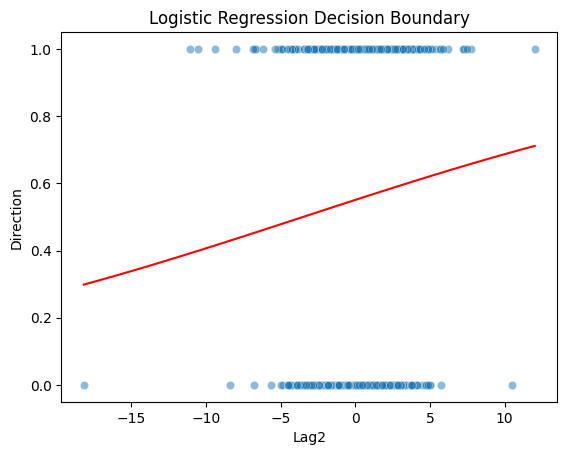

In [51]:
# Create a scatter plot
sns.scatterplot(x='Lag2', y='Direction', data=train, alpha=0.5)

# Create a range of values for Lag2 to plot the decision boundary
x_vals = np.linspace(train['Lag2'].min(), train['Lag2'].max(), 100)
x_vals = add_constant(x_vals)

# Predict the probabilities using the logistic regression model
y_vals = log_reg_fit_1.predict(x_vals)

# Plot the decision boundary
plt.plot(x_vals[:, 1], y_vals, color='red')
plt.xlabel('Lag2')
plt.ylabel('Direction')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [53]:
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(train[['Lag2']], train['Direction'])
lda_fit.score(test[['Lag2']], test['Direction'])

0.625

In [54]:
lda_conf_matrix = make_confusion_matrix(lda_fit, test[['Lag2']], test['Direction'])
print(lda_conf_matrix)

             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56


c:\Users\rgbmr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


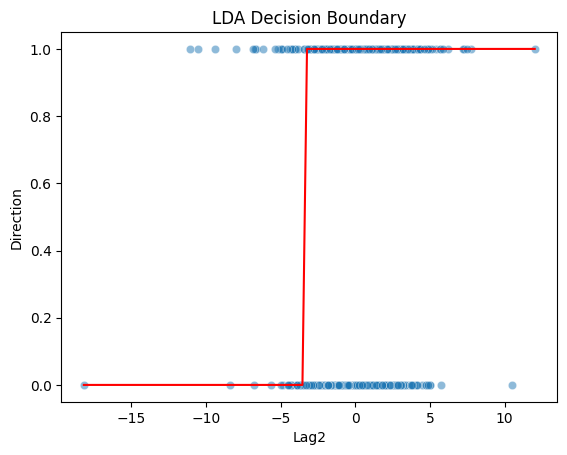

In [60]:
# plot decision boundary
sns.scatterplot(x='Lag2', y='Direction', data=train, alpha=0.5)
x_vals = np.linspace(train['Lag2'].min(), train['Lag2'].max(), 100)
y_vals = lda_fit.predict(x_vals[:, np.newaxis])
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Lag2')
plt.ylabel('Direction')
plt.title('LDA Decision Boundary')
plt.show()

In [56]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(train[['Lag2']], train['Direction'])
qda_fit.score(test[['Lag2']], test['Direction'])

0.5865384615384616

In [57]:
qda_conf_matrix = make_confusion_matrix(qda_fit, test[['Lag2']], test['Direction'])
print(qda_conf_matrix)

             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61


c:\Users\rgbmr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


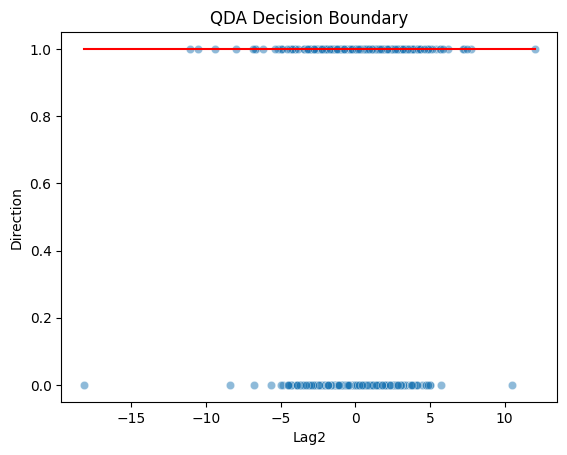

In [58]:
# plot decision boundary
sns.scatterplot(x='Lag2', y='Direction', data=train, alpha=0.5)
x_vals = np.linspace(train['Lag2'].min(), train['Lag2'].max(), 100)
y_vals = qda_fit.predict(x_vals[:, np.newaxis])
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Lag2')
plt.ylabel('Direction')
plt.title('QDA Decision Boundary')
plt.show()

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn.fit(train[['Lag2']], train['Direction'])
knn_fit.score(test[['Lag2']], test['Direction'])

0.5096153846153846

In [62]:
knn_conf_matrix = make_confusion_matrix(knn_fit, test[['Lag2']], test['Direction'])
print(knn_conf_matrix)

             Predicted Down  Predicted Up
Actual Down              22            21
Actual Up                30            31


c:\Users\rgbmr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


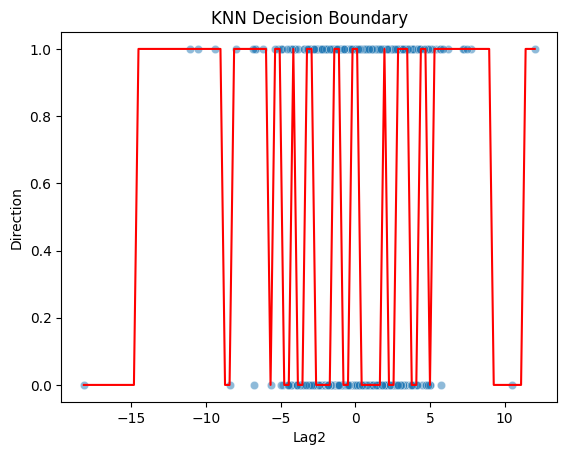

In [63]:
# plot decision boundary
sns.scatterplot(x='Lag2', y='Direction', data=train, alpha=0.5)
x_vals = np.linspace(train['Lag2'].min(), train['Lag2'].max(), 100)
y_vals = knn_fit.predict(x_vals[:, np.newaxis])
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Lag2')
plt.ylabel('Direction')
plt.title('KNN Decision Boundary')
plt.show()

In [64]:
nb = GaussianNB()
nb_fit = nb.fit(train[['Lag2']], train['Direction'])
nb_fit.score(test[['Lag2']], test['Direction'])

0.5865384615384616

In [65]:
nb_conf_matrix = make_confusion_matrix(nb_fit, test[['Lag2']], test['Direction'])
print(nb_conf_matrix)

             Predicted Down  Predicted Up
Actual Down               0            43
Actual Up                 0            61


c:\Users\rgbmr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


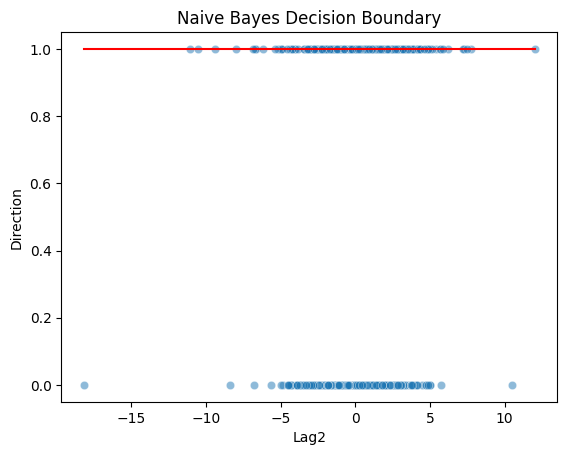

In [66]:
# plot decision boundary
sns.scatterplot(x='Lag2', y='Direction', data=train, alpha=0.5)
x_vals = np.linspace(train['Lag2'].min(), train['Lag2'].max(), 100)
y_vals = nb_fit.predict(x_vals[:, np.newaxis])
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Lag2')
plt.ylabel('Direction')
plt.title('Naive Bayes Decision Boundary')
plt.show()